<a href="https://colab.research.google.com/github/pranitha-pedapudi/codediversify/blob/main/Stock_price_prediction(Tesla).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock market is a place where buying and selling of shares happen for publicly listed companies. (Stocks lso known as equities represent ownership in a company). Stock exchange is the mediator thatallows buying and selling of shares.

**Importance of Stock Market :**
* Helps companies to raise capital
* Helps cretae personal wealth
* Serves as an indicator of the state of the economy.
* Help to increase investment.

**Stock Market Prediction**
Stock Market Prediction helps us determine the future value of stock and other financial instruments traded on an exchange.

The whole idea of Predicting the stock market prices is to gain significant profits.

Predicting how a stock market will perform is a difficult task to do, there are a lot of other factors involving the prediction such as the physical and psychological factors, rational and irrational behaviour, etc; all these factors combine to make share prices dynamic and volatile this makes it very difficult to predict the stock prices with high accuracy.

In this case we are going to try and predict the stock prices using Machine Learning Algorithms (such as the linear regression alogorithm and long short term memory networks for building our prediction models.)

**Linear Regression:**
Linear Regression is a very popular statistical technique used for solving machine learning problems, it is a supervised learning algorithm to predict the outcome of a continuos variable.
It can be udes to prdict the total revenue of a company, the total units expected to be sold of a certain product, weather prediction, and of course stock price prediction.

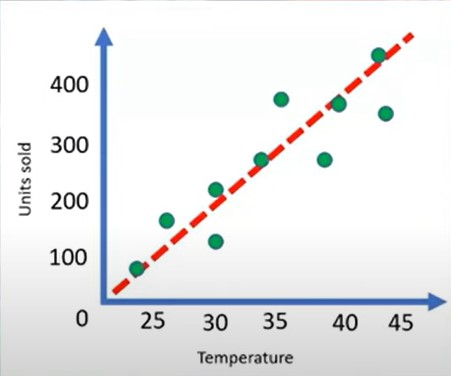

The above graph is the visualization of the sale of Ice-Creams based on the temperature.
 The red line is the regression line which gives the predicted output, i.e., unit sold based on the input feature, i.e., temperature, and the green dots are the Actual data points.
 X-Axis has the input variable the temperature, and the Y-Axis has the target variable the Units sold.
** Formula: Y = mx + c.** where m is the slope of the line and c is the intercept.
 We find the coeffiecients and plot the regression line.
 The best fit line should have the least suqared distance between orignal data points and the predicted data points.

In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
tesla = pd.read_csv("/content/tesla.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
#to find the total rows and columns in the data set the info function will also return the datatype of the variable and checks if there are any null value.
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
#Cnvert the date column into datetime format
tesla['Date'] = pd.to_datetime(tesla['Date'])

<ipython-input-5-7aa670533d6d>:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
#Exploratory data analysis and get insights from the data, here we are finding out the data is between what dates and how many days in total.
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')


Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [ ]:
#summary of the data
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

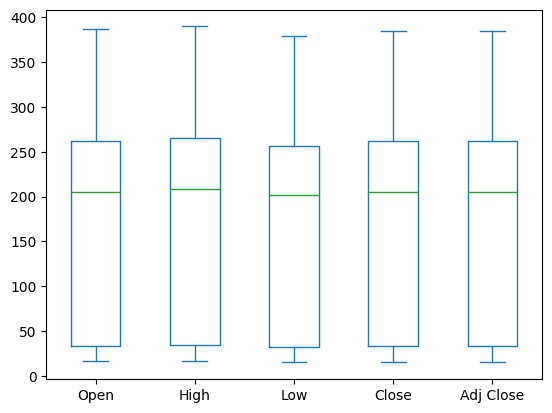

In [ ]:
tesla[['Open','High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

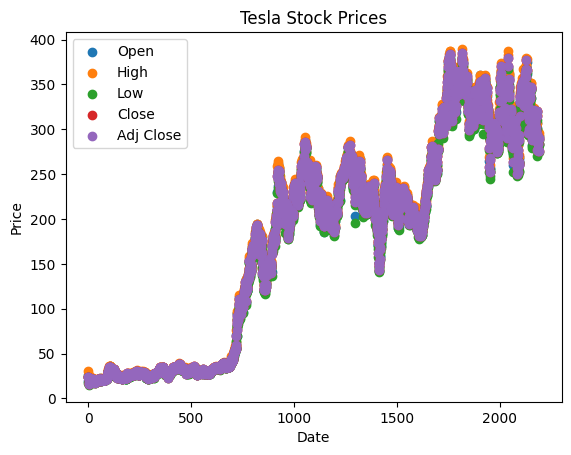

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(tesla.index, tesla['Open'], label='Open')
plt.scatter(tesla.index, tesla['High'], label='High')
plt.scatter(tesla.index, tesla['Low'], label='Low')
plt.scatter(tesla.index, tesla['Close'], label='Close')
plt.scatter(tesla.index, tesla['Adj Close'], label='Adj Close')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices')
plt.legend()

# Show plot
plt.show()


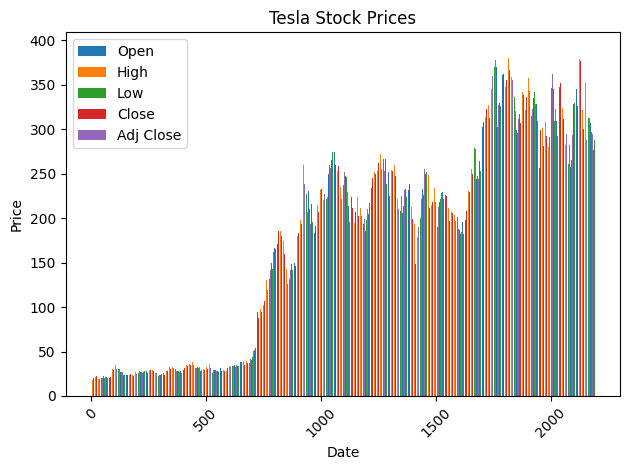

In [ ]:
# Define the x-axis (dates)
x = tesla.index

# Define the y-axis data (stock prices)
open_prices = tesla['Open']
high_prices = tesla['High']
low_prices = tesla['Low']
close_prices = tesla['Close']
adj_close_prices = tesla['Adj Close']

# Set the width of the bars
bar_width = 0.15

# Plot the bars
plt.bar(x - 2 * bar_width, open_prices, width=bar_width, label='Open')
plt.bar(x - bar_width, high_prices, width=bar_width, label='High')
plt.bar(x, low_prices, width=bar_width, label='Low')
plt.bar(x + bar_width, close_prices, width=bar_width, label='Close')
plt.bar(x + 2 * bar_width, adj_close_prices, width=bar_width, label='Adj Close')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


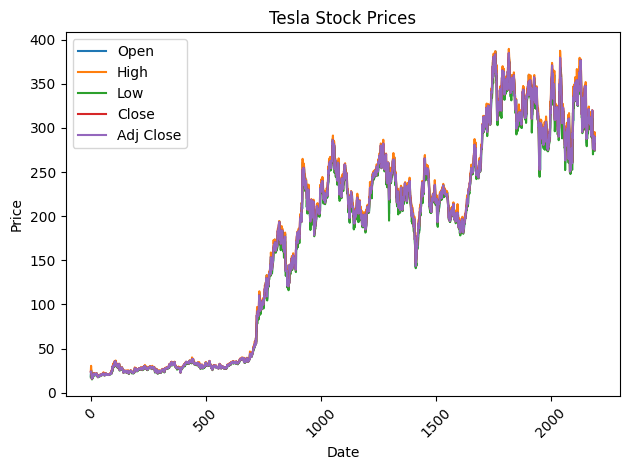

In [ ]:
import matplotlib.pyplot as plt

# Plot the lines
plt.plot(tesla.index, tesla['Open'], label='Open')
plt.plot(tesla.index, tesla['High'], label='High')
plt.plot(tesla.index, tesla['Low'], label='Low')
plt.plot(tesla.index, tesla['Close'], label='Close')
plt.plot(tesla.index, tesla['Adj Close'], label='Adj Close')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values for the training set
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(tesla['Date'][X_train.flatten()], Y_train, label='Actual', color='blue')

# Plot predicted values
plt.plot(tesla['Date'][X_train.flatten()], train_predictions, label='Predicted', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Values (Train Set)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()



NameError: name 'X_train' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
#plot(plot)
#plotting offline
iplot(plot)

In [ ]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

In [ ]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [ ]:
iplot(plot2)

In [ ]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)